In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('Myntra_Fasion_Clothing.csv')

C:\Users\karti\AppData\Local\Temp\ipykernel_17760\258843772.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Myntra_Fasion_Clothing.csv')


In [5]:
df.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [6]:
df.drop(columns=["URL","Description"], inplace=True)

In [7]:
df.head()

,Product_id,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,2296012,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,11895958,Roadster,Topwear,shirts,Men,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,11690882,Roadster,Western,tshirts,Women,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [8]:
len(np.unique(df['BrandName']))

2088

In [9]:
np.unique(df['Category'])

array(['Bottom Wear', 'Indian Wear', 'Inner Wear &  Sleep Wear',
       'Lingerie & Sleep Wear', 'Plus Size', 'Sports Wear', 'Topwear',
       'Western'], dtype=object)

In [10]:
len(np.unique(df['Individual_category']))

92

In [11]:
df['Category'].value_counts()

Category
Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: count, dtype: int64

In [30]:
#removing outliers
df = df[df['DiscountPrice (in Rs)'] < 10000]
df = df[df['DiscountPrice (in Rs)'] > 0]
df = df[df['DiscountOffer'] < 100]
df = df[df['DiscountOffer'] > 0]
df = df[df['OriginalPrice (in Rs)'] < 50000]
df = df[df['OriginalPrice (in Rs)'] > 0]


TypeError: '<' not supported between instances of 'str' and 'int'

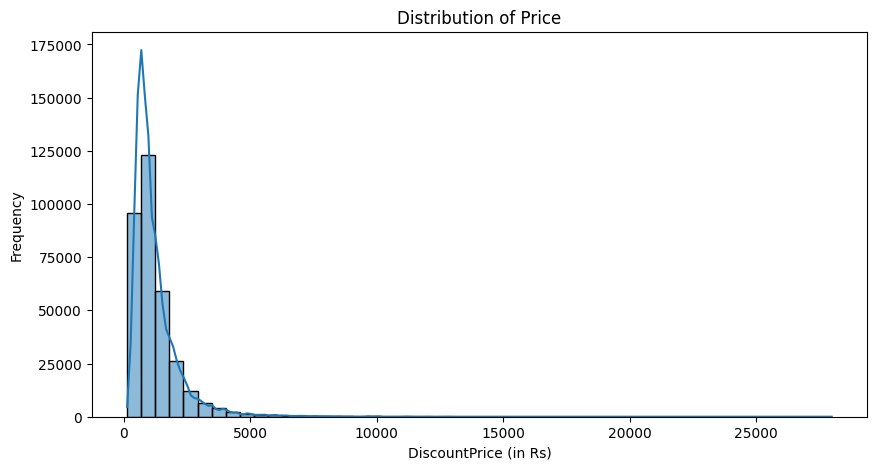

In [18]:
#EDA: comparing ratings for high priced items vs low priced items:
df['DiscountPrice (in Rs)'].describe()
df['DiscountPrice (in Rs)'].isnull().sum() #checking for null values in price column
df['DiscountPrice (in Rs)'].isna().sum() #checking for null values in price column
# ccomparing ratings for high priced items vs low priced items:
df['DiscountPrice (in Rs)'].quantile(0.75) #75th percentile of price column
df['DiscountPrice (in Rs)'].quantile(0.25) #25th percentile of price column
df['DiscountPrice (in Rs)'].quantile(0.50) #50th percentile of price column
df['DiscountPrice (in Rs)'].quantile(0.90) #90th percentile of price column
df['DiscountPrice (in Rs)'].quantile(0.10) #10th percentile of price column
#plots the distribution of price column:
plt.figure(figsize=(10,5))
sns.histplot(df['DiscountPrice (in Rs)'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('DiscountPrice (in Rs)')
plt.ylabel('Frequency')
plt.show()


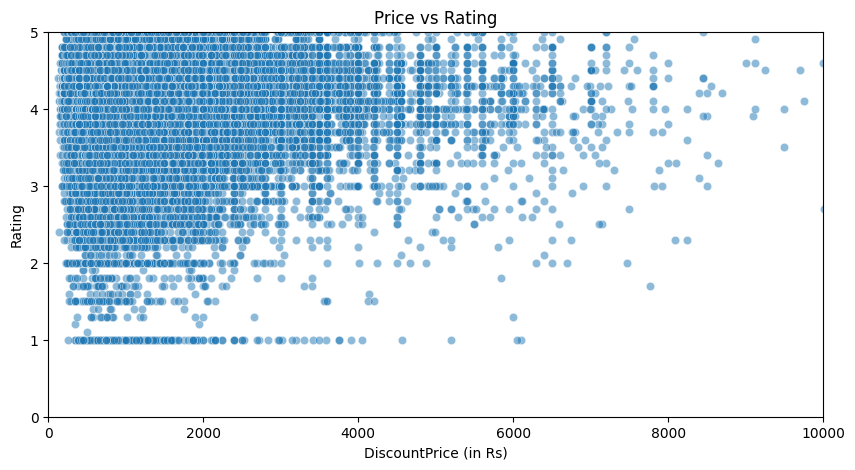

In [28]:
#compare price and ratinigs gradient plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='DiscountPrice (in Rs)', y='Ratings', data=df, alpha=0.5)
plt.title('Price vs Rating')
plt.xlabel('DiscountPrice (in Rs)')
plt.ylabel('Rating')
plt.xlim(0, 10000)
plt.ylim(0, 5)
plt.show()

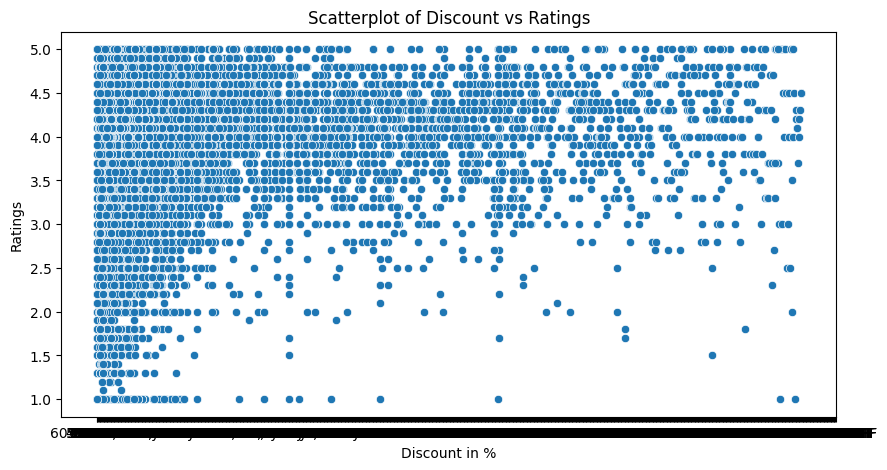

In [26]:
#compare discount to user ratings gradinent plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='DiscountOffer', y='Ratings', data=df)
plt.title('Scatterplot of Discount vs Ratings')
plt.xlabel('Discount in %')
plt.ylabel('Ratings')
plt.show()

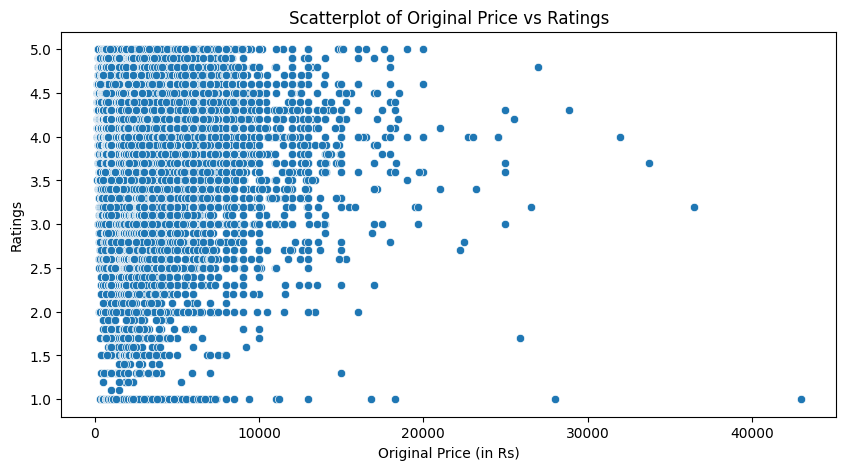

In [23]:
#Originalprice vs ratings gradient plot:
plt.figure(figsize=(10,5))
sns.scatterplot(x='OriginalPrice (in Rs)', y='Ratings', data=df)
plt.title('Scatterplot of Original Price vs Ratings')
plt.xlabel('Original Price (in Rs)')
plt.ylabel('Ratings')
plt.show()